<a href="https://colab.research.google.com/github/Shimo-Kota/Shimo-Kota/blob/main/%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E3%81%AE%E5%9F%BA%E7%A4%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データ分析の基礎

## データの観察と理解

### ヒストグラム
以下では，[SSDSE-E](https://www.nstac.go.jp/use/literacy/ssdse/#SSDSE-E)のデータからデータフレームを作成し，「合計特殊出生率」の項目についてヒストグラムを可視化しています．

まず，Matplotlibを日本語での表示に対応させるjapanize_matplotlibモジュールをインストールしてインポートしておきます．

ヒストグラムはMatplotlibのpyplotモジュールの関数`hist`を用いて描画しています．
- ここでは，関数[`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)にデータフレーム`df`の列（シリーズ）を指定しています．
  - データフレームの`hist`メソッドを用いて，`df['合計特殊出生率'].hist()`のようにpyplotモジュールの関数`hist`を呼び出すこともできます．
- 階級の数は，関数`hist`の引数`bins`に指定できます（デフォルトは`10`）．

In [ ]:
!python --version # Pythonのバージョン

Python 3.10.12


In [ ]:
!pip install japanize_matplotlib # japanize_matplotlibのインストール
#!pip install matplotlib-fontja # Python 3.12以降

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=ed9f5e0ef55991276bb9b22d2a42d1da20a38f6e7b739ef9a3f2235113107c09
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

In [ ]:
# csvファイルの読み込みとデータフレームの作成
URL = 'https://www.nstac.go.jp/sys/files/SSDSE-E-2024.csv'
df = pd.read_csv(URL, skiprows=[0, 1, 3], encoding='shift_jis')

In [ ]:
df.head()

,地域コード,都道府県,総人口,日本人人口,15歳未満人口,15〜64歳人口,65歳以上人口,外国人人口,出生数,合計特殊出生率,...,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数,消費支出（二人以上の世帯）,食料費（二人以上の世帯）,住居費（二人以上の世帯）,教養娯楽費（二人以上の世帯）
0,R01000,北海道,5140000,5098000,530000,2924000,1686000,34321,28762,1.20,...,2818,13731,4418,11802,1075,76885,277737,73037,24873,27234
1,R02000,青森県,1204000,1198000,123000,663000,419000,5409,6513,1.31,...,505,2773,735,2345,472,30738,249660,73725,10541,20068
2,R03000,岩手県,1181000,1173000,125000,648000,408000,6937,6472,1.30,...,557,2700,1016,2536,393,28580,285815,77251,18814,25733
3,R04000,宮城県,2280000,2256000,258000,1363000,659000,19453,13761,1.15,...,1051,5950,1896,5502,506,40519,287781,78589,22951,26516
4,R05000,秋田県,930000,926000,86000,484000,359000,3651,4335,1.22,...,427,2444,619,2066,272,21915,275545,73628,13191,24327


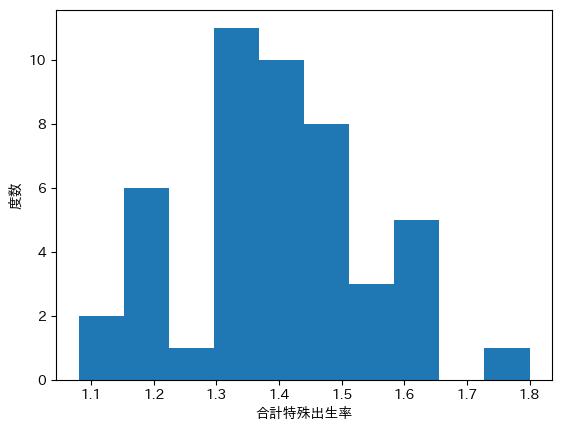

In [ ]:
# ヒストグラムの描画
plt.hist(df['合計特殊出生率'])
plt.xlabel('合計特殊出生率')
plt.ylabel('度数')
plt.show()

### 記述統計量
以下では，SSDSE-Eのデータの「合計特殊出生率」の項目について，記述統計量を計算しています．

データフレームの[`describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)を用いると，指定した列の記述統計量（`mean`（平均値）， `std`（標本標準偏差），`min`（最小値），`25%`（第1四分位数），`50%`（第2四分位数（中央値）），`75%`（第3四分位数），`max`（最大値））を計算できます．
- 平均値，標本標準偏差，最小値，中央値，最大値はそれぞれデータフレームの[`mean`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html), [`std`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html), [`min`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html), [`median`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html), [`max`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html)の各メソッドを用いて計算することもできます．

In [ ]:
df['合計特殊出生率'].describe() # 記述統計量の計算

,合計特殊出生率
count,47.000000
mean,1.399787
std,0.146072
min,1.080000
25%,1.305000
50%,1.400000
75%,1.475000
max,1.800000


### 箱ひげ図

以下では，Matplotlibのpyplotモジュールの関数[`boxplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)を用いて，SSDSE-Eのデータの「合計特殊出生率」の項目について箱ひげ図を描画しています．

ここでは，関数`boxplot`にデータフレーム`df`の列（シリーズ）を指定しています．
- データフレームの`boxplot`メソッドを用いて，`df.boxplot(['合計特殊出生率'])`のようにして箱ひげ図を描画することもできます．

複数の箱ひげ図を並べて描画することもできます．
データフレームの場合は複数の列を`boxplot`に指定します．

引数`labels`には各箱ひげ図のラベル名を指定します．

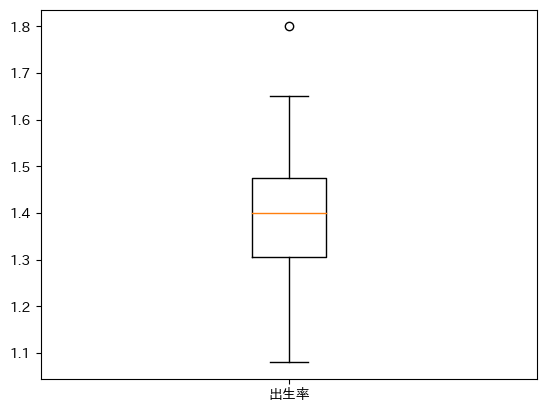

In [ ]:
# 箱ひげ図の描画
plt.boxplot(df['合計特殊出生率'], labels = ['出生率'])
plt.show()

箱ひげ図の上端のヒゲの外側に白丸があり，外れ値が1つあることがわかります．

### 散布図と相関係数

まず，SSDSE-Eのデータの「保育所等数」と「総人口」の項目をもとに，データフレーム`df`に各都道府県の人口1万人あたりの「保育所等数」の列を作成しています．

In [ ]:
df['1万人あたり保育所等数'] = df['保育所等数'] * 10000 / df['総人口']

#### 散布図
以下では，Matplotlibのpyplotモジュールの関数`scatter`を用いて，「出生率」と「保育所等数」の関係を散布図として可視化しています．

散布図では，「出生率」，「保育所等数」それぞれの平均値をデータフレームの`mean`で計算し，それらの値に対応する破線を関数[`axhline`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html)を用いて描画しています．
- 線の色は引数`color`に，線の形状は引数`linestyle`にそれぞれ指定できます．

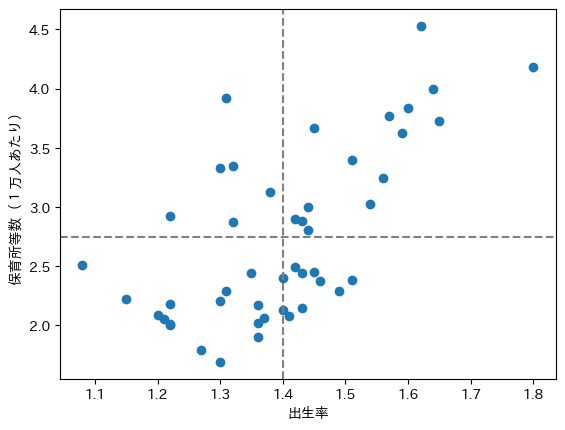

In [ ]:
# 散布図の描画
plt.scatter(df['合計特殊出生率'], df['1万人あたり保育所等数'])
plt.axvline(df['合計特殊出生率'].mean(), color='gray', linestyle='dashed')
plt.axhline(df['1万人あたり保育所等数'].mean(), color='gray', linestyle='dashed')
plt.xlabel('出生率')
plt.ylabel('保育所等数（１万人あたり）')
plt.show()

#### 相関係数
以下では，データフレームの[`corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)メソッドを用いてデータフレームの指定した列間の相関係数を計算し，相関係数行列を作成しています．

「出生率」と人口1万人あたりの「保育所等数」の相関係数の値は約0.657となります．

In [ ]:
df[['合計特殊出生率', '1万人あたり保育所等数']].corr() # 相関係数行列の計算

,合計特殊出生率,1万人あたり保育所等数
合計特殊出生率,1.000000,0.656926
1万人あたり保育所等数,0.656926,1.000000


## データの整形と加工

以下では，まず，[SSDSE-A](https://www.nstac.go.jp/use/literacy/ssdse/#SSDSE-A)のデータに含まれる1741市区町村の「都道府県」，「市区町村」，「総人口」，「65歳以上人口」の項目からなるデータフレーム`df`を作成します．

In [ ]:
# csvファイルの読み込みとデータフレームの作成
URL = 'https://www.nstac.go.jp/sys/files/SSDSE-A-2024.csv'
df = pd.read_csv(URL, skiprows=[0, 1], encoding='shift_jis')
df = df[['都道府県', '市区町村', '総人口', '65歳以上人口']]

In [ ]:
df

,都道府県,市区町村,総人口,65歳以上人口
0,北海道,札幌市,1973395,541242
1,北海道,函館市,251084,89257
2,北海道,小樽市,111299,45426
3,北海道,旭川市,329306,112411
4,北海道,室蘭市,82383,30330
...,...,...,...,...
1736,沖縄県,久米島町,7192,2145
1737,沖縄県,八重瀬町,30941,6925
1738,沖縄県,多良間村,1058,323
1739,沖縄県,竹富町,3942,905


### データの並び替え
データフレームの[`sort_values`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)メソッドを呼び出すと，指定した列の値に基づいてデータフレームの行を並び替えることができます．

並び替えの優先順に列名を要素とするリストにより複数の列を指定することができます．

以下では，データフレーム`df`の「総人口」の列の値に基づいて行を昇順に並び替えたデータフレームが返ります．

降順に並び替える場合は，`sort_values`メソッドの引数`ascending`に`False`を指定します．

In [ ]:
df.sort_values(['総人口']) # データフレームの行の並び替え

,都道府県,市区町村,総人口,65歳以上人口
401,福島県,双葉町,0,0
687,東京都,青ヶ島村,169,31
685,東京都,御蔵島村,323,58
681,東京都,利島村,327,80
1731,沖縄県,渡名喜村,346,143
...,...,...,...,...
1468,福岡県,福岡市,1612392,338930
0,北海道,札幌市,1973395,541242
984,愛知県,名古屋市,2332176,566154
1112,大阪府,大阪市,2752412,676821


In [ ]:
df.sort_values(['総人口'], ascending=False)

,都道府県,市区町村,総人口,65歳以上人口
689,神奈川県,横浜市,3777491,920583
1112,大阪府,大阪市,2752412,676821
984,愛知県,名古屋市,2332176,566154
0,北海道,札幌市,1973395,541242
1468,福岡県,福岡市,1612392,338930
...,...,...,...,...
1731,沖縄県,渡名喜村,346,143
681,東京都,利島村,327,80
685,東京都,御蔵島村,323,58
687,東京都,青ヶ島村,169,31


### データの条件抽出
以下では，データフレームの行の条件抽出を用いて「総人口」または「65歳以上人口」の列の値が`0`に合致する行を抽出しています．

In [ ]:
df[(df['総人口'] == 0) | (df['65歳以上人口'] == 0)] # データフレームの行の条件抽出

,都道府県,市区町村,総人口,65歳以上人口
401,福島県,双葉町,0,0


### 欠損値の処理
以下では，値がないことを表す`None`で「総人口」および「65歳以上人口」の`0`の値を置き換えています．
- pandasのシリーズやデータフレームでは，データに欠損値（たとえば，空の値）が含まれる場合，欠損値は`NaN`と表されます．

データフレームの[`dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)メソッドを呼び出すと，欠損値を含む行を除去したデータフレームを返します．
- `dropna`メソッドの引数`axis`に`1`を指定すると欠損値を含む列を除去したデータフレームを返します．

ここでは，`dropna`メソッドの引数`inplace`に`True`を指定することで，元のデータフレームの欠損値を含む行を除去しています．

In [ ]:
# 欠損値を含む行の除去
df.loc[df['総人口'] == 0, '総人口'] = None
df.loc[df['65歳以上人口'] == 0, '65歳以上人口'] = None
df.dropna(inplace=True)

In [ ]:
df.sort_values(['総人口'])

,都道府県,市区町村,総人口,65歳以上人口
687,東京都,青ヶ島村,169.0,31.0
685,東京都,御蔵島村,323.0,58.0
681,東京都,利島村,327.0,80.0
1731,沖縄県,渡名喜村,346.0,143.0
751,新潟県,粟島浦村,353.0,146.0
...,...,...,...,...
1468,福岡県,福岡市,1612392.0,338930.0
0,北海道,札幌市,1973395.0,541242.0
984,愛知県,名古屋市,2332176.0,566154.0
1112,大阪府,大阪市,2752412.0,676821.0


データフレームにはこの他にも欠損値を処理するためのメソッドが複数用意されています．
たとえば，[`isnull`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html)メソッドを用いると欠損値が含まれているかを判定することができます．

また，[`fillna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)メソッドを用いると欠損値をさまざまな方法で補完することができます．

### 外れ値の処理
以下では，各市区町村の「高齢化率」（総人口に占める65歳以上人口の割合）を表す列をデータフレーム`df`に新たに作成しています．

In [ ]:
df['高齢化率'] = df['65歳以上人口'] * 100 / df['総人口'] # データフレームの列の作成

以下では，データフレーム`df`の「高齢化率」の列の値に基づいて行を降順に並び替えたデータフレームを返しています．

In [ ]:
df.sort_values(['高齢化率'], ascending=False)

,都道府県,市区町村,総人口,65歳以上人口,高齢化率
492,群馬県,南牧村,1611.0,1051.0,65.238982
877,長野県,天龍村,1178.0,732.0,62.139219
490,群馬県,神流町,1645.0,1011.0,61.458967
378,福島県,金山町,1862.0,1134.0,60.902256
1217,奈良県,御杖村,1479.0,891.0,60.243408
...,...,...,...,...,...
629,東京都,港区,260486.0,42546.0,16.333315
627,東京都,千代田区,66680.0,10852.0,16.274745
628,東京都,中央区,169179.0,24683.0,14.589872
688,東京都,小笠原村,2929.0,413.0,14.100376


ここで，この高齢化率のデータを次のように箱ひげ図として可視化すると，ヒゲの外側の白丸で示される外れ値が含まれていることがわかります．

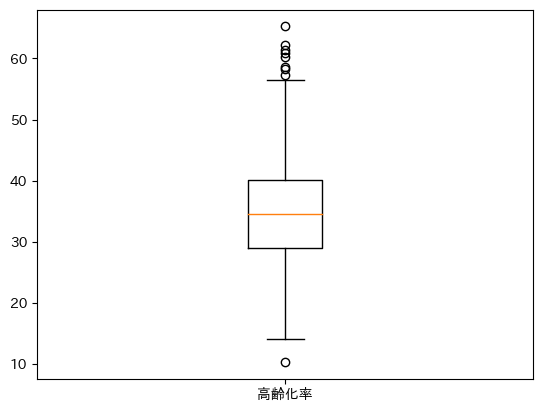

In [ ]:
plt.boxplot(df['高齢化率'], labels=['高齢化率'])
plt.show()

以下では，箱ひげ図における外れ値の定義をもとに，市区町村の高齢化率のデータの値の上限値と下限値を外れ値の境界値として計算しています．

データフレームの[`quantile`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)メソッドを呼び出すと，指定した列の値の分位数（`0.25`は第1四分位数，`0.75`は第3四分位数）を求めることができます．

In [ ]:
# 外れ値の境界値の計算
c = '高齢化率'
q1 = df[c].quantile(0.25)
q3 = df[c].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(f'{lower:.2f}, {upper:.2f}')

12.20, 56.77


以下では，外れ値の境界値をもとに，データフレームの行の条件抽出を用いて外れ値を含む行を抽出しています．

In [ ]:
df[(df[c] < lower) | (df[c] > upper)] # 外れ値を含む行の条件抽出

,都道府県,市区町村,総人口,65歳以上人口,高齢化率
378,福島県,金山町,1862.0,1134.0,60.902256
400,福島県,大熊町,847.0,87.0,10.271547
405,福島県,飯舘村,1318.0,755.0,57.283763
490,群馬県,神流町,1645.0,1011.0,61.458967
492,群馬県,南牧村,1611.0,1051.0,65.238982
877,長野県,天龍村,1178.0,732.0,62.139219
1217,奈良県,御杖村,1479.0,891.0,60.243408
1234,奈良県,東吉野村,1502.0,875.0,58.255659
1452,高知県,大豊町,3252.0,1907.0,58.640836
